
# Import Library

In [30]:
#### Pandas
import pandas as pd
from pandas import Series

#### numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

#### Machine learning
from sklearn.linear_model import LinearRegression
from sklearn import ensemble
from xgboost import XGBRegressor
import xgboost
import warnings
from sklearn.model_selection import train_test_split

# Import Data

In [2]:
train_set = pd.read_csv('E:/BDAP/Datasets/Rossmann/train.csv')
test_set = pd.read_csv('E:/BDAP/Datasets/Rossmann/test.csv')
store = pd.read_csv('E:/BDAP/Datasets/Rossmann/store.csv')

C:\Program Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Finding and handling the missing data in Store data set

In [3]:
print(store.describe())
print(store.head())

            Store  CompetitionDistance  CompetitionOpenSinceMonth  \
count  1115.00000          1112.000000                 761.000000   
mean    558.00000          5404.901079                   7.224704   
std     322.01708          7663.174720                   3.212348   
min       1.00000            20.000000                   1.000000   
25%     279.50000           717.500000                   4.000000   
50%     558.00000          2325.000000                   8.000000   
75%     836.50000          6882.500000                  10.000000   
max    1115.00000         75860.000000                  12.000000   

       CompetitionOpenSinceYear       Promo2  Promo2SinceWeek  Promo2SinceYear  
count                761.000000  1115.000000       571.000000       571.000000  
mean                2008.668857     0.512108        23.595447      2011.763573  
std                    6.195983     0.500078        14.141984         1.674935  
min                 1900.000000     0.000000         1

# Checking for the missing Value and Handling Missing Value

In [4]:
store['PromoInterval'] = store['PromoInterval'].fillna(0)   
store['Promo2SinceWeek'] = store['Promo2SinceWeek'].fillna(0)
store['Promo2SinceYear'] = store['Promo2SinceYear'].fillna(0)

#### Fill the empty values for CompetitionOpenSinceMonth and CompetitionOpenSinceYear with mode.
#### And CompetitionDistance with median
store['CompetitionOpenSinceMonth'] = store['CompetitionOpenSinceMonth'].fillna(9)
store['CompetitionOpenSinceYear'] = store['CompetitionOpenSinceYear'].fillna(2013)
store['CompetitionDistance'] = store['CompetitionDistance'].fillna(2325)

In [5]:
#### Replacing Categorical data to Numeric data
store['PromoInterval'] = store['PromoInterval'].replace('Feb,May,Aug,Nov', 1)    
store['PromoInterval'] = store['PromoInterval'].replace('Jan,Apr,Jul,Oct', 2)    
store['PromoInterval'] = store['PromoInterval'].replace('Mar,Jun,Sept,Dec', 3) 
pd.Categorical(store['StoreType']).describe()
store['StoreType'] = store['StoreType'].replace(('a','b','c','d'),(1,2,3,4))
pd.Categorical(store['Assortment']).describe()
store['Assortment'] = store['Assortment'].replace(('a','b','c'),(1,2,3))
store.dtypes

Store                          int64
StoreType                      int64
Assortment                     int64
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                  int64
dtype: object

In [6]:
store['CompetitionDistance'] = store['CompetitionDistance'].astype(int)
store['CompetitionOpenSinceMonth'] = store['CompetitionOpenSinceMonth'].astype(object)
store['CompetitionOpenSinceYear'] = store['CompetitionOpenSinceYear'].astype(object)
store['Promo2SinceWeek'] = store['Promo2SinceWeek'].astype(object)
store['Promo2SinceYear'] = store['Promo2SinceYear'].astype(object)

store.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

# Replacing Categorical data to Numeric data in Train data set

In [7]:
train_set.shape
pd.Categorical(train_set['StateHoliday']).describe()
train_set['StateHoliday'] = train_set['StateHoliday'].replace(('a','b','c'),(1,2,3))
train_set['StateHoliday'] = train_set['StateHoliday'].replace('0',0)
train_set.isnull().sum()
train_set.dtypes


Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday      int64
SchoolHoliday     int64
dtype: object

# Removing the store which are closed and whose sales are zero

# As there Perdicting will result to zero.

In [8]:
train_set= train_set.ix[~((train_set.Open==0)&(train_set.Sales==0))]

print(train_set.columns)
train_set.head()

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')


C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


# Handling mssing Value in test dataset and replacing Categorical Value to numeric.

In [9]:
test_set.shape
test_set.head()
test_set.isnull().sum()
test_set['Open'] = test_set['Open'].fillna(1)
pd.Categorical(test_set['StateHoliday']).describe()
test_set['StateHoliday'] = test_set['StateHoliday'].replace(('0','a'),(0,1))


In [10]:
print(store.head())
print(train_set.head())
print(test_set.head())

   Store  StoreType  Assortment  CompetitionDistance  \
0      1          3           1                 1270   
1      2          1           1                  570   
2      3          1           1                14130   
3      4          3           3                  620   
4      5          1           1                29910   

  CompetitionOpenSinceMonth CompetitionOpenSinceYear  Promo2 Promo2SinceWeek  \
0                         9                     2008       0               0   
1                        11                     2007       1              13   
2                        12                     2006       1              14   
3                         9                     2009       0               0   
4                         4                     2015       0               0   

  Promo2SinceYear  PromoInterval  
0               0              0  
1            2010              2  
2            2011              2  
3               0              0  
4      

Write the data into csv file

In [11]:
store.to_csv('E:/BDAP/Datasets/Rossmann/store_df.csv')
train_set.to_csv('E:/BDAP/Datasets/Rossmann/Rossmann_train.csv')
test_set.to_csv('E:/BDAP/Datasets/Rossmann/Rossmann_test.csv')

rossmann_df = pd.read_csv('E:/BDAP/Datasets/Rossmann/Rossmann_train.csv',index_col=0)
test_df = pd.read_csv('E:/BDAP/Datasets/Rossmann/Rossmann_test.csv',index_col=0)
store_df = pd.read_csv('E:/BDAP/Datasets/Rossmann/store_df.csv',index_col=0)

# Visualization

In [12]:
rossmann_df.info()
print("----------------------------")
store_df.info()
print("----------------------------")
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 1017190
Data columns (total 9 columns):
Store            844392 non-null int64
DayOfWeek        844392 non-null int64
Date             844392 non-null object
Sales            844392 non-null int64
Customers        844392 non-null int64
Open             844392 non-null int64
Promo            844392 non-null int64
StateHoliday     844392 non-null int64
SchoolHoliday    844392 non-null int64
dtypes: int64(8), object(1)
memory usage: 64.4+ MB
----------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1115 entries, 0 to 1114
Data columns (total 10 columns):
Store                        1115 non-null int64
StoreType                    1115 non-null int64
Assortment                   1115 non-null int64
CompetitionDistance          1115 non-null int64
CompetitionOpenSinceMonth    1115 non-null float64
CompetitionOpenSinceYear     1115 non-null float64
Promo2                       1115 non-null int64
Pro

# Date
# Create Year and Month columns

In [13]:
rossmann_df['Year']  = rossmann_df['Date'].apply(lambda x: int(str(x)[:4]))
rossmann_df['Month'] = rossmann_df['Date'].apply(lambda x: int(str(x)[5:7]))

test_df['Year']  = test_df['Date'].apply(lambda x: int(str(x)[:4]))
test_df['Month'] = test_df['Date'].apply(lambda x: int(str(x)[5:7]))

# Assign Date column to Date(Year-Month) instead of (Year-Month-Day).

# This column will be useful in analysis and visualization.

In [14]:
rossmann_df['Date'] = rossmann_df['Date'].apply(lambda x: (str(x)[:7]))
test_df['Date']     = test_df['Date'].apply(lambda x: (str(x)[:7]))

#### group by date and get average sales, and precent change
average_sales    = rossmann_df.groupby('Date')["Sales"].mean()
pct_change_sales = rossmann_df.groupby('Date')["Sales"].sum().pct_change()

# Plot the average sales and Percent change.

# Plot average sales over time(year-month).

# Plot precent change for sales over time(year-month).

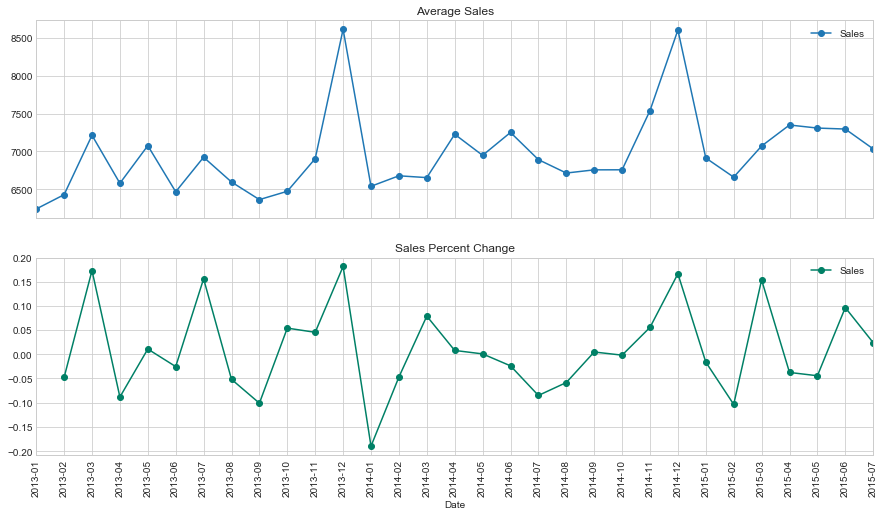

In [15]:
fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))
ax1 = average_sales.plot(legend=True,ax=axis1,marker='o',title="Average Sales")
ax1.set_xticks(range(len(average_sales)))
ax1.set_xticklabels(average_sales.index.tolist(), rotation=90)
ax2 = pct_change_sales.plot(legend=True,ax=axis2,marker='o',rot=90,colormap="summer",title="Sales Percent Change")
plt.show()

# Plot average sales & customers for every year

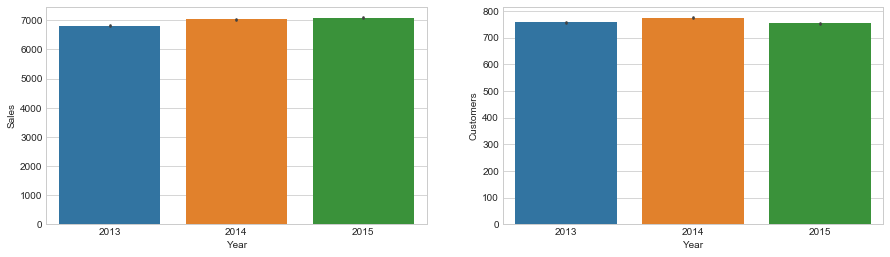

In [16]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
sns.barplot(x='Year', y='Sales', data=rossmann_df, ax=axis1)
sns.barplot(x='Year', y='Customers', data=rossmann_df, ax=axis2)
plt.show()

# Customers. 

# Plot max, min values, & 2nd, 3rd quartile.

# Group by date and get average customers, and precent change.

# Plot average customers over the time it should be correlated with the average sales over time

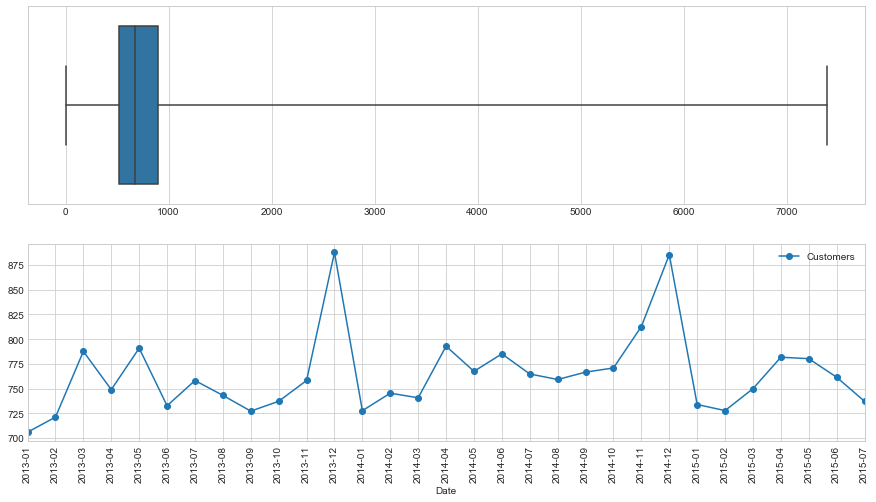

In [17]:
fig, (axis1,axis2) = plt.subplots(2,1,figsize=(15,8))
sns.boxplot([rossmann_df["Customers"]], whis=np.inf, ax=axis1)

average_customers      = rossmann_df.groupby('Date')["Customers"].mean()
pct_change_customers = rossmann_df.groupby('Date')["Customers"].sum().pct_change()

ax = average_customers.plot(legend=True,marker='o', ax=axis2)
ax.set_xticks(range(len(average_customers)))
xlabels = ax.set_xticklabels(average_customers.index.tolist(), rotation=90)
plt.show()

# DayOfWeek

# In both cases where the store is closed and opened

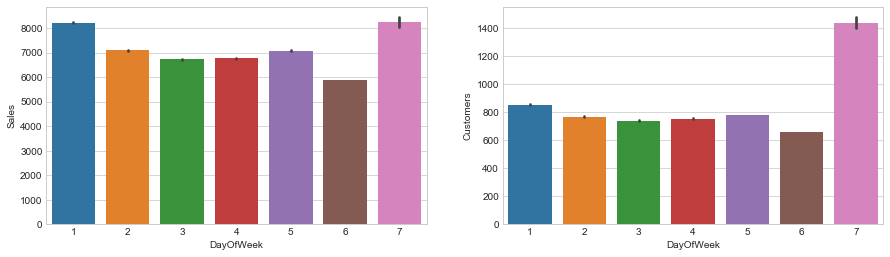

In [18]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
sns.barplot(x='DayOfWeek', y='Sales', data=rossmann_df, order=[1,2,3,4,5,6,7], ax=axis1)
sns.barplot(x='DayOfWeek', y='Customers', data=rossmann_df, order=[1,2,3,4,5,6,7], ax=axis2)
plt.show()

# Sales

# Plot max, min values, & 2nd, 3rd quartile.

# Plot sales values.

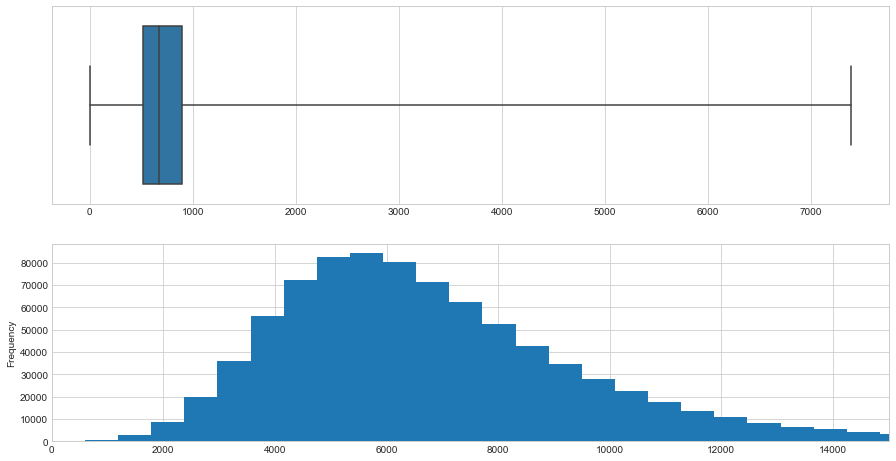

In [19]:
fig, (axis1,axis2) = plt.subplots(2,1,figsize=(15,8))
sns.boxplot([rossmann_df["Customers"]], whis=np.inf, ax=axis1)
rossmann_df["Sales"].plot(kind='hist',bins=70,xlim=(0,15000),ax=axis2)
plt.show()

# Merge store_df with average store sales & customers

In [20]:
average_sales_customers = rossmann_df.groupby('Store')[["Sales", "Customers"]].mean()
sales_customers_df = pd.DataFrame({'Store':average_sales_customers.index,
                      'Sales':average_sales_customers["Sales"], 'Customers': average_sales_customers["Customers"]}, 
                      columns=['Store', 'Sales', 'Customers'])
store_df = pd.merge(sales_customers_df, store_df, on='Store')

# StoreType 

# Plot StoreType, & StoreType Vs average sales and customers

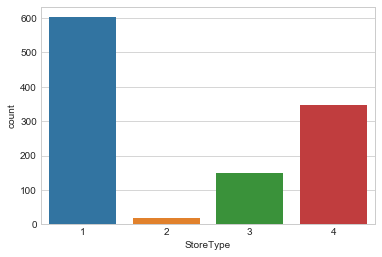

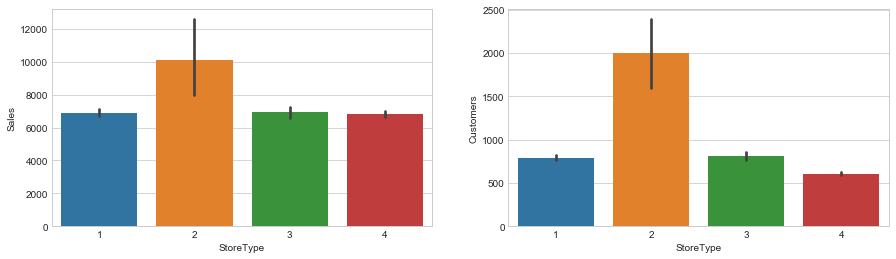

In [21]:
sns.countplot(x='StoreType', data=store_df, order=[1,2,3, 4])
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
sns.barplot(x='StoreType', y='Sales', data=store_df, order=[1,2,3, 4],ax=axis1)
sns.barplot(x='StoreType', y='Customers', data=store_df, order=[1,2,3, 4], ax=axis2)
plt.show()

# Model Building

In [22]:
train_set = pd.read_csv('E:/BDAP/Datasets/Rossmann/Rossmann_train.csv',index_col=0)
test_set = pd.read_csv('E:/BDAP/Datasets/Rossmann/Rossmann_test.csv',index_col=0)
store = pd.read_csv('E:/BDAP/Datasets/Rossmann/store_df.csv',index_col=0)

# Create dummy varibales for DayOfWeek for both Train and test set

In [23]:
day_dummies  = pd.get_dummies(train_set['DayOfWeek'], prefix='Day')
day_dummies_test  = pd.get_dummies(test_set['DayOfWeek'],prefix='Day')


train_set = train_set.join(day_dummies)
test_set  = test_set.join(day_dummies_test)

# Save ids of closed stores, because we will assign their sales value to 0 later(see below)

In [24]:
closed_store_ids = test_set["Id"][test_set["Open"] == 0].values

# Removing Observation were store is closed and sales is zero

In [25]:
train_set= train_set.ix[~((train_set.Open==0)&(train_set.Sales==0))]                           
test_set= test_set.ix[~((test_set.Open==0))]
                           
train_set.drop(['DayOfWeek','Open','Customers', 'Date','Day_7'], axis=1,inplace=True)
test_set.drop(['DayOfWeek','Open', 'Date','Day_7'], axis=1,inplace=True)

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


# Merge the store data and the Test Data

In [26]:
df_train = pd.merge(train_set,store, on = 'Store')

df_test = pd.merge(test_set,store, on = 'Store')

In [27]:
print(df_train.isnull().sum())
print(df_test.isnull().sum())

Store                        0
Sales                        0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
Day_1                        0
Day_2                        0
Day_3                        0
Day_4                        0
Day_5                        0
Day_6                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64
Id                           0
Store                        0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
Day_1                        0
Day_2                        0
Day_3                        0
Day_4                        0
Day_5                        0
Day_6                        0
StoreType                 

# Feature Selection

[0]	train-rmse:6945.52
[10]	train-rmse:3442
[20]	train-rmse:2638.51
[30]	train-rmse:2468.74
[40]	train-rmse:2361.06
[50]	train-rmse:2298.94
[60]	train-rmse:2226.9
[70]	train-rmse:2162.55


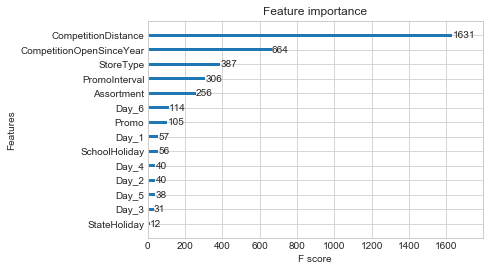

In [31]:
X_train, X_val, y_train, y_val = train_test_split(df_train.drop(["Sales","Store",'CompetitionOpenSinceMonth','Promo2','Promo2SinceYear','Promo2SinceWeek'],axis=1), df_train[["Sales"]],
                                                    test_size=0.9, random_state=42)
d_train = xgboost.DMatrix(X_train, y_train)
xgb_params = {
    "objective"         : "reg:linear"
    ,"eta"              : 0.1
    ,"max_depth"        : 6
    ,"min_child_weight" :10
    ,"gamma"            :0.70
    ,"subsample"        :0.76
    ,"colsample_bytree" :0.95
    ,"alpha"            :2e-05
    ,"lambda"           :10
}

watchlist= [(d_train, "train")]
bst = xgboost.train(params=xgb_params, dtrain=d_train, num_boost_round=80, evals=watchlist, verbose_eval=10)
xgboost.plot_importance(bst)
plt.show()

In [32]:
rossmann_dic = dict(list(df_train.groupby('Store')))
test_dic     = dict(list(df_test.groupby('Store')))
submission   = Series()
scores       = []

In [ ]:
for i in test_dic:
    
    # current store
    store = rossmann_dic[i]
    
    # define training and testing sets
    X_train = store.drop(["Sales","Store",'CompetitionOpenSinceMonth','Promo2','Promo2SinceYear','Promo2SinceWeek','StateHoliday','CompetitionOpenSinceYear'],axis=1)
    Y_train = store["Sales"]
    X_test  = test_dic[i].copy()
    
    store_ids = X_test["Id"]
    X_test.drop(["Id","Store",'CompetitionOpenSinceMonth','Promo2SinceYear','Promo2','Promo2SinceWeek','StateHoliday','CompetitionOpenSinceYear'], axis=1,inplace=True)
    
    # Linear Regression
    #lreg = LinearRegression()
    #lreg.fit(X_train, Y_train)
    #Y_pred = lreg.predict(X_test)
    #scores.append(lreg.score(X_train, Y_train))
    #0.14879
    
    #clf = ensemble.GradientBoostingRegressor(n_estimators= 400, max_depth=5,min_samples_split=2,
    #                                                          learning_rate=0.01, loss = 'huber')
    #clf.fit(X_train,Y_train)
    #Y_pred = clf.predict(X_test)
    #scores.append(clf.score(X_train, Y_train))
    #0.14755 - ls
    #0.13805 - huber
    
    model = XGBRegressor(learning_rate=0.01,n_estimators=300,gamma=0.1,
                          objective='reg:linear',
                          base_score=0.5,max_depth=10)
    model.fit(X_train,Y_train)
    Y_pred = model.predict(X_test)
    scores.append(model.score(X_train, Y_train))
    #0.13588
    
    # append predicted values of current store to submission
    submission = submission.append(Series(Y_pred, index=store_ids))

# append rows(store,date) that were closed, and assign their sales value to 0
submission = submission.append(Series(0, index=closed_store_ids))

submission.to_csv('E:/BDAP/Datasets/Rossmann/submission.csv')